# Backtest a  Strategy

In [1]:
from smartbots.crypto.historical_downloader import historical_downloader, Universe
import datetime as dt
from smartbots.engine.data_reader import read_data_to_dataframe
from smartbots.engine.portfolio_constructor import Portfolio_Constructor

C:\Users\jacar\OneDrive\Escritorio\SmartBots\venv\lib\site-packages\arctic\store\_pandas_ndarray_store.py:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## 1) Download Historical Data from Data Provider and save into the database.
If you already have the data in a database, you can skip this step and go to the next.
Dependings of the symbols and the length of the data, the data loader will take some time to complete. Be pacience.
If there are already some data in the database, it will update only the new data.


In [ ]:
# Parameters
provider = 'kucoin'
symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
start_date = dt.datetime(2022,1,1) # Start date of data to download
end_date = dt.datetime.utcnow() # End date of data to download
interval = '1min' # Interval of data to download
historical_downloader(symbols=symbols,start_date=start_date, end_date=dt.datetime.utcnow(),
       provider=provider,clean_symbols_database=[],interval=interval)

## 2) Read Historical Data from Database and Visualize it.


In [7]:
provider = 'kucoin'
symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
start_date = dt.datetime(2022,1,1) # Start date of data to download
end_date = dt.datetime.utcnow() # End date of data to download
df = read_data_to_dataframe(symbols[0], provider,start_date=start_date,end_date=end_date)

<AxesSubplot:xlabel='date'>

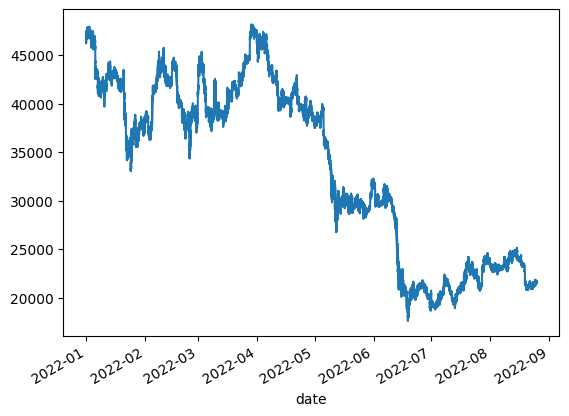

In [11]:
df.close.plot()

## 3) BackTesting

### Settings

In [2]:
provider = 'kucoin'
start_date = dt.datetime(2022,1,1) # Start date for backtesting

strategy1 = {'id': 1, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'BTC-USDT',
             'short_period': 10,
             'long_period': 50,
             'quantity': 0.1}}


conf_portfolio = {'Name': 'PortfolioCrypto1',
                  'Data_Sources': 
                  [{'ticker': 'BTC-USDT',
                   'event_type': 'bar',
                   'historical_source': 'mongoDB',
                   'historical_library': f'{provider}_historical_1min'}],
                   'Strategies': 
                    [strategy1]}

In [3]:
portfolio = Portfolio_Constructor(conf_portfolio, run_real=False, asset_type='crypto',
                                             send_orders_to_broker=False, start_date=start_date)
portfolio.run_simulation() # backtest 

info_port = portfolio.get_saved_values_strategy() # read change of positions

BTC-USDT_202201
BTC-USDT_202202
BTC-USDT_202203
BTC-USDT_202204
BTC-USDT_202205
BTC-USDT_202206
BTC-USDT_202207
BTC-USDT_202208


In [5]:
len(portfolio.orders)

5325